In [1]:
import numpy as np
import matplotlib.pyplot as plt

## creating data

In [2]:
x1 = np.random.multivariate_normal([2,3],[[1,0.2],[0.2,3]],500)
x2 = np.random.multivariate_normal([8,9],[[1,0.7],[0.7,3]],500)

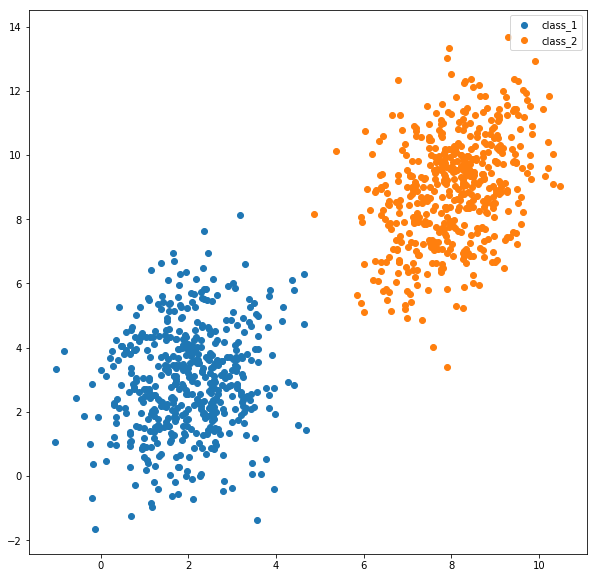

In [3]:
plt.figure(figsize=(10,10))
plt.scatter(x1[:,0],x1[:,1],label = 'class_1')
plt.scatter(x2[:,0],x2[:,1],label = 'class_2')
plt.legend()

In [4]:
x = np.vstack([x1,x2]) # creating the full dataset of both classes in a single dataset 
ones = np.ones((1000,1))
x = np.hstack([ones,x,ones]) # adding ones at the beginning for bias weight and oners at the end for y_values

In [5]:
x[:500,-1] = 0 # setting y_values of first class to '0' 

In [6]:
np.random.shuffle(x) # shuffling the dataset

In [7]:
y = x[:,-1] # separating x and y vectors
x = x[:,:-1]

In [8]:
x

array([[1.        , 1.49584717, 2.1594462 ],
       [1.        , 3.95283851, 2.7553695 ],
       [1.        , 1.83282617, 2.2026368 ],
       ...,
       [1.        , 0.2544534 , 3.89827951],
       [1.        , 6.98577676, 9.54028275],
       [1.        , 6.26155223, 8.8415022 ]])

In [9]:
split = int(0.8*1000)
split

800

### Creating training and test datasets

In [10]:
X_train = x[:split]
X_test = x[split:]

Y_train = y[:split]
Y_test = y[split:]

In [11]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [12]:
def hypothesis(theta,x):
    z = np.dot(theta.T,x)
    return sigmoid(z)

In [13]:
def error(x,y,theta):
    m = x.shape[0]
    loss = 0
    for i in range(m):
        y_hat = hypothesis(theta,x[i])
        loss += -( y[i]*np.log(y_hat) + (1-y[i])*np.log(1-y_hat) )
       
    return loss

In [14]:
def gradient(x,y,theta):
    grad = np.zeros((x.shape[1],))
    m = x.shape[0]
    for i in range(m):
        y_hat = hypothesis(theta,x[i])
        grad += (y_hat - y[i])*x[i]
       
    return grad

In [15]:
def train(x,y,learning_rate = 0.0001,epochs = 500):
    theta = np.zeros((x.shape[1],))
    error_l = []
    for i in range(epochs):
        grad = gradient(x,y,theta)
        theta = theta - learning_rate*grad
        error_l.append(error(x,y,theta))
       
    return error_l,theta

In [16]:
error_list,theta = train(X_train,Y_train,epochs=2000)

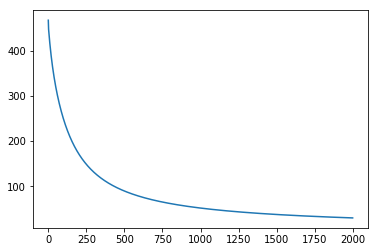

In [17]:
plt.plot(error_list)

## Visualising the decision boundary

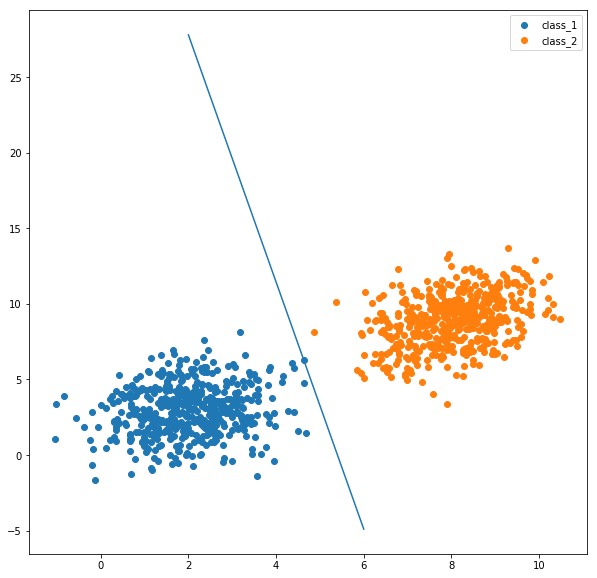

In [18]:
plt.figure(figsize=(10,10))
plt.scatter(x1[:,0],x1[:,1],label = 'class_1')
plt.scatter(x2[:,0],x2[:,1],label = 'class_2')
x = np.linspace(2,6,5)
y = -(theta[1]*x + theta[0])/theta[2]
plt.plot(x,y)
plt.legend()

In [19]:
def predict(x_test,y_test,theta):
    #vectorised implementation
    y_pred = np.dot(x_test,theta)
    for i in range(y_pred.shape[0]):
        if y_pred[i]>=0.5:
            y_pred[i] = 1
           
        else:
            y_pred[i] = 0
           
      
    return np.mean(y_pred == y_test)*100

In [20]:
predict(X_test,Y_test,theta)

100.0

## The accuracy comes out to be 100% !!